In [3]:
!pip install kagglehub

In [11]:
import os
import kagglehub

# Set your own folder path to save the dataset
os.environ["KAGGLEHUB_CACHE"] = "/Users/vanshitaparab/Documents/SEM 7/Lab/AIDS-II/Jupyter"

# Now download dataset
path = kagglehub.dataset_download("mrdheer/cars-dataset")

print("Path to dataset files:", path)


100%|█████████████████████████████████████████| 108k/108k [00:00<00:00, 150kB/s]

Extracting files...
Path to dataset files: /Users/vanshitaparab/Documents/SEM 7/Lab/AIDS-II/Jupyter/datasets/mrdheer/cars-dataset/versions/1


In [15]:
import pandas as pd
df = pd.read_csv('/Users/vanshitaparab/Documents/SEM 7/Lab/AIDS-II/Jupyter/datasets/mrdheer/cars-dataset/versions/1/cars.csv')
display(df.head())

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


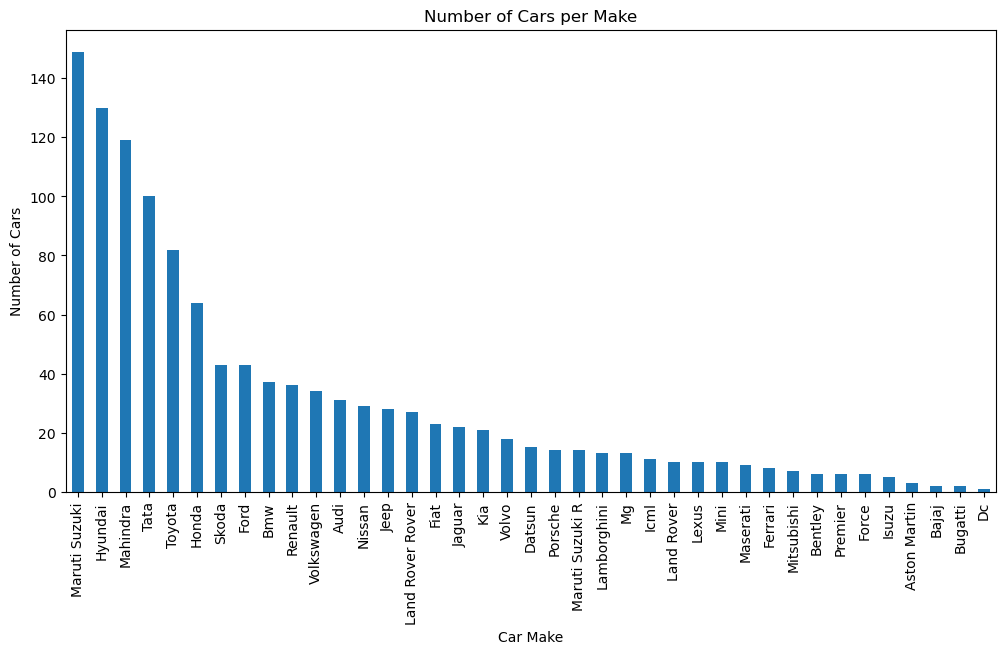

In [17]:
import matplotlib.pyplot as plt
car_counts = df['Make'].value_counts()
plt.figure(figsize=(12, 6))
car_counts.plot(kind='bar')
plt.title('Number of Cars per Make')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.show()

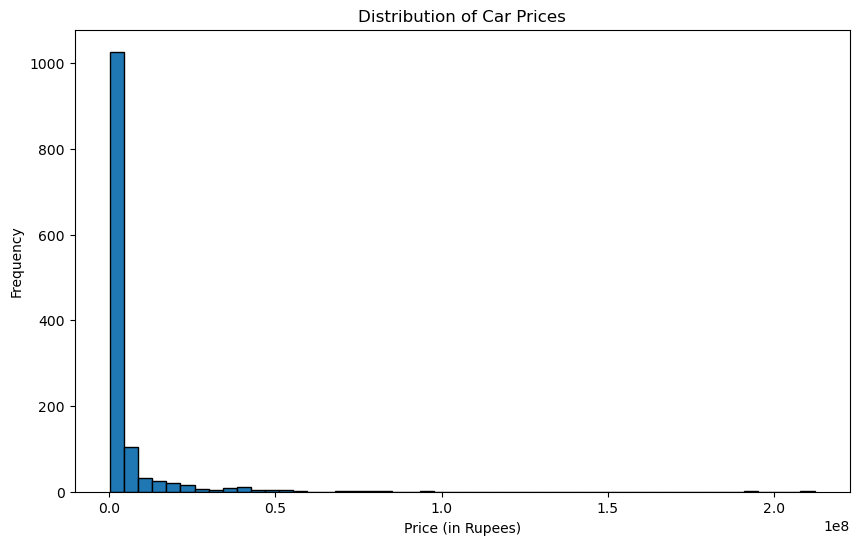

In [19]:
import matplotlib.pyplot as plt
df['Ex-Showroom_Price_cleaned'] = df['Ex-Showroom_Price'].str.replace('Rs. ', '', regex=False).str.replace(',', '', regex=False)
df['Ex-Showroom_Price_cleaned'] = pd.to_numeric(df['Ex-Showroom_Price_cleaned'])
plt.figure(figsize=(10, 6))
plt.hist(df['Ex-Showroom_Price_cleaned'], bins=50, edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in Rupees)')
plt.ylabel('Frequency')
plt.show()print(df.columns)


In [21]:
print(df.columns)

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Automatic_Headlamps', 'Engine_Type', 'ASR_/_Traction_Control',
       'Cruise_Control', 'USB_Ports', 'Heads-Up_Display', 'Welcome_Lights',
       'Battery', 'Electric_Range', 'Ex-Showroom_Price_cleaned'],
      dtype='object', length=141)


In [25]:
print([col for col in df.columns if 'Fuel' in col])

['Fuel_System', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Average_Fuel_Consumption', 'Fuel-lid_Opener', 'Fuel_Gauge', 'Low_Fuel_Warning', 'Fuel_Efficiency_cleaned']


In [49]:
print(df.shape)
print(df.columns)
print(df.head())

(1276, 143)
Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range',
       'Ex-Showroom_Price_cleaned', 'Fuel_Efficiency_cleaned',
       'Power_cleaned'],
      dtype='object', length=143)
   Make      Model  Variant Ex-Showroom_Price Displacement  Cylinders  \
0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc        2.0   
1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc        2.0   
2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc        2.0   
3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc        2.0   
4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RW

In [51]:
df.dropna(subset=['Power_cleaned', 'Fuel_Efficiency_cleaned'])

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,Ex-Showroom_Price_cleaned,Fuel_Efficiency_cleaned,Power_cleaned


In [57]:
df['Average_Fuel_Consumption']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1271    Yes
1272    Yes
1273    Yes
1274    Yes
1275    Yes
Name: Average_Fuel_Consumption, Length: 1276, dtype: object

In [59]:
[x for x in df.columns if 'fuel' in x.lower() or 'mileage' in x.lower() or 'efficiency' in x.lower()]

['Fuel_System',
 'Fuel_Tank_Capacity',
 'Fuel_Type',
 'City_Mileage',
 'Highway_Mileage',
 'ARAI_Certified_Mileage',
 'ARAI_Certified_Mileage_for_CNG',
 'Average_Fuel_Consumption',
 'Fuel-lid_Opener',
 'Fuel_Gauge',
 'Low_Fuel_Warning',
 'Fuel_Efficiency_cleaned']

In [61]:
import re

# Clean Power
df['Power_cleaned'] = (
    df['Power']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')  # extract numeric part
    .astype(float)
)

# Clean Fuel Efficiency (handles km/l, kmpl, commas, spaces, etc.)
df['Fuel_Efficiency_cleaned'] = (
    df['Average_Fuel_Consumption']
    .astype(str)
    .str.lower()
    .str.replace(',', '.', regex=False)
    .str.replace('kmpl', '', regex=False)
    .str.replace('km/l', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.extract(r'(\d+\.?\d*)')
    .astype(float)
)

# Drop rows where conversion failed
df_cleaned = df.dropna(subset=['Power_cleaned', 'Fuel_Efficiency_cleaned']).copy()

print("Before cleaning:", len(df))
print("After cleaning:", len(df_cleaned))
print(df_cleaned[['Power_cleaned', 'Fuel_Efficiency_cleaned']].head(10))

Before cleaning: 1276
After cleaning: 0
Empty DataFrame
Columns: [Power_cleaned, Fuel_Efficiency_cleaned]
Index: []


In [63]:
print(df['Average_Fuel_Consumption'].dropna().unique()[:30])

['Yes']


In [65]:
for col in ['City_Mileage', 'Highway_Mileage', 'ARAI_Certified_Mileage']:
    print(f"\n{col}:")
    print(df[col].dropna().unique()[:20])


City_Mileage:
['?23.6 km/litre' '21.38 km/litre' '25.17 km/litre' '12 km/litre'
 '11 km/litre' '14 km/litre' '19 km/litre' '20.6 km/litre' '23 km/litre'
 '23.84 km/litre' '20.89 km/litre' '15.1 km/litre' '13 km/litre'
 '20 km/litre' '20.3 km/litre' '19.49 km/litre' '22,95 km/litre'
 '17,57 km/litre' '14.6 km/litre' '16.3 km/litre']

Highway_Mileage:
['24 km/litre' '15 km/litre' '17 km/litre' '24.07 km/litre' '23 km/litre'
 '22 km/litre' '20.89 km/litre' '16 km/litre' '23.7 km/litre'
 '17.71 km/litre' '18.16 km/litre' '23.59 km/litre' '23.08 km/litre'
 '15.7 km/litre' '19.8 km/litre' '19.1 km/litre' '18.6 km/litre'
 '22.54 km/litre' '18.5 km/litre' '22.5 km/litre']

ARAI_Certified_Mileage:
['23.6 km/litre' '21.9 km/litre' '25.17 km/litre' '22.5 km/litre'
 '23 km/litre' '23.01 km/litre' '24.04 km/litre' '15 km/litre'
 '24.07 km/litre' '20.1 km/litre' '23.1 km/litre' '20.3 km/litre'
 '24 km/litre' '20.89 km/litre' '20.5 km/litre' '16 km/litre'
 '23.7 km/litre' '18.16 km/litre' '23.59 km/

Before cleaning: 1276
After cleaning: 1162
       Power_cleaned  Fuel_Efficiency_cleaned
count    1162.000000              1162.000000
mean      153.672461                19.902246
std       136.573186                42.839322
min        13.000000                 3.400000
25%        83.000000                15.600000
50%       107.000000                18.190000
75%       166.000000                21.500000
max      1600.000000              1449.000000


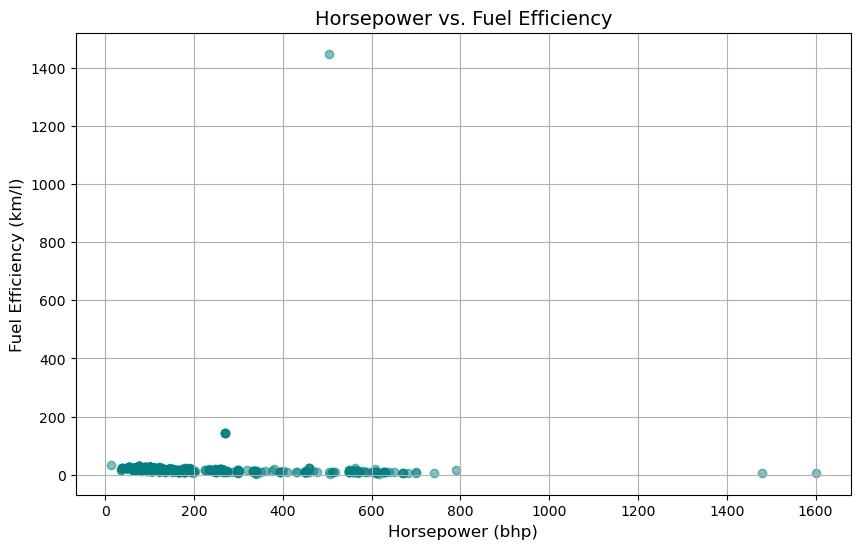

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Clean Power column ---
df['Power_cleaned'] = (
    df['Power']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')      # Extract numeric part
    .astype(float)
)

# --- Clean Fuel Efficiency column (use ARAI_Certified_Mileage) ---
df['Fuel_Efficiency_cleaned'] = (
    df['ARAI_Certified_Mileage']
    .astype(str)
    .str.replace('?', '', regex=False)  # Remove any '?'
    .str.replace(',', '.', regex=False) # Replace comma with dot
    .str.replace('km/litre', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.extract(r'(\d+\.?\d*)')        # Extract numeric part
    .astype(float)
)

# --- Drop missing rows ---
df_cleaned = df.dropna(subset=['Power_cleaned', 'Fuel_Efficiency_cleaned']).copy()

print("Before cleaning:", len(df))
print("After cleaning:", len(df_cleaned))
print(df_cleaned[['Power_cleaned', 'Fuel_Efficiency_cleaned']].describe())

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Power_cleaned'], df_cleaned['Fuel_Efficiency_cleaned'], alpha=0.5, color='teal')
plt.title('Horsepower vs. Fuel Efficiency', fontsize=14)
plt.xlabel('Horsepower (bhp)', fontsize=12)
plt.ylabel('Fuel Efficiency (km/l)', fontsize=12)
plt.grid(True)
plt.show()

In [69]:
display(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1275
Columns: 143 entries, Make to Power_cleaned
dtypes: float64(8), int64(1), object(134)
memory usage: 1.3+ MB


None

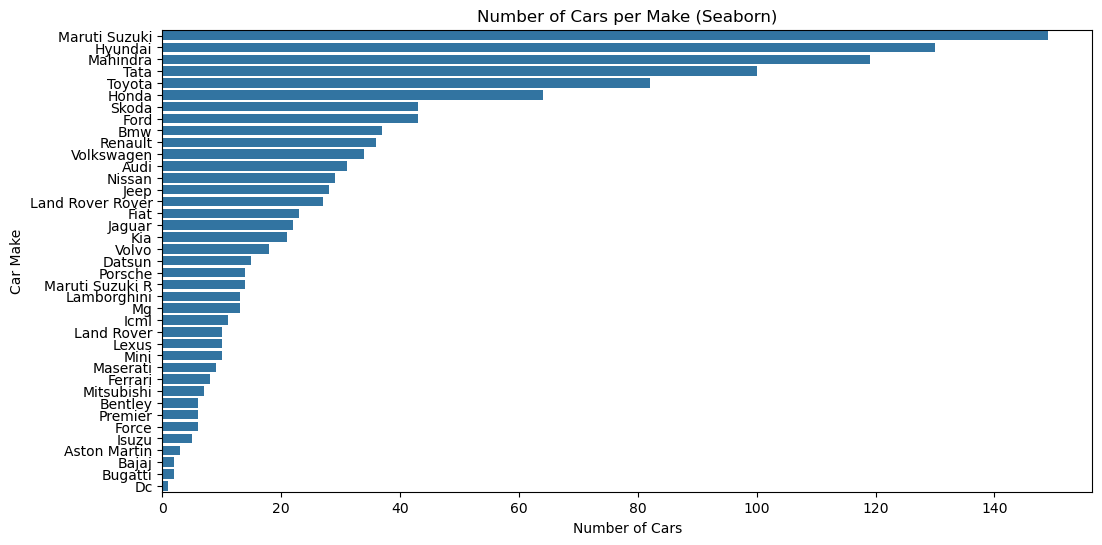

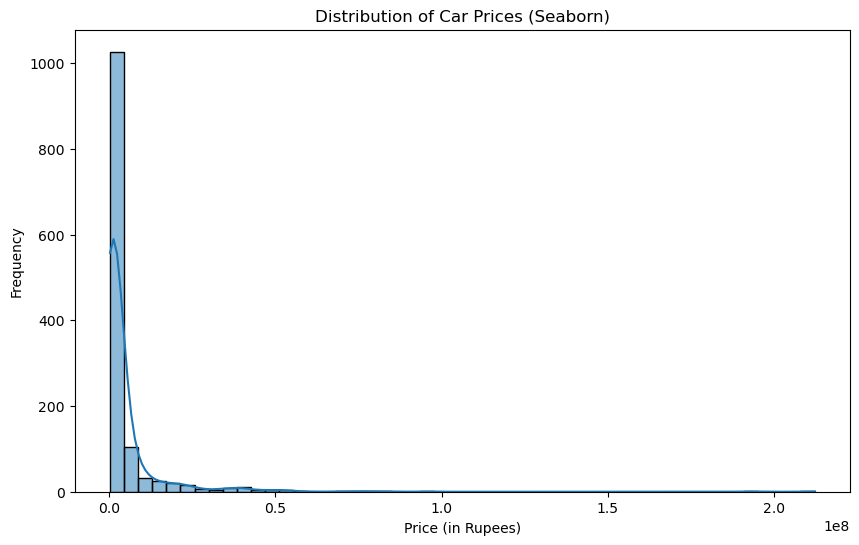

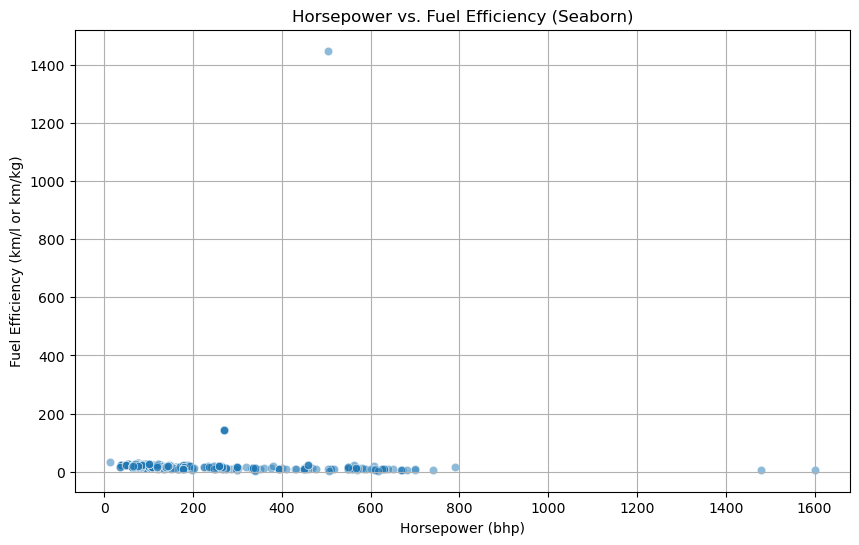

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart
plt.figure(figsize=(12, 6))
sns.countplot(y='Make', data=df, order = df['Make'].value_counts().index)
plt.title('Number of Cars per Make (Seaborn)')
plt.xlabel('Number of Cars')
plt.ylabel('Car Make')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Ex-Showroom_Price_cleaned'], bins=50, kde=True)
plt.title('Distribution of Car Prices (Seaborn)')
plt.xlabel('Price (in Rupees)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power_cleaned', y='Fuel_Efficiency_cleaned', data=df_scatter, alpha=0.5)
plt.title('Horsepower vs. Fuel Efficiency (Seaborn)')
plt.xlabel('Horsepower (bhp)')
plt.ylabel('Fuel Efficiency (km/l or km/kg)')
plt.grid(True)
plt.show()